# Práctica N°1 Guiada - Regresión univariable
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal \\
  
 
 ----




1.  En esta práctica se pide realizar pruebas utilizando   diferentes funciones de pérdida. 

2.  Su equipo debe implementar el algoritmo de machine learning para  regresión lineal y realizar las correspondientes pruebas el siguiente  [Dataset](https://drive.google.com/file/d/1W60C0Vkqx6qWhIZLADezokQugMwmfb22/view?usp=sharing).  

3.  Deberá seleccionar del Dataset un 70% para entrenamiento y un 30% para realizar *testing*. Recuerde que los datos tanto para entrenamieto como para *testing* deben ser tomados aleatoriamente \\

4. Utilizar las siguientes f2 unciones de pérdida para realizar las comparaciones. Además, recuerde que las derivadas van a cambiar cada vez que cambie le función de pérdida.

  *   MSE Loss Function \\

    $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i)) ²$ \\

  *   MAE Loss Function \\
$MAE = \frac{1}{m}\sum_{i=0}^m |y_i - h(x_i)|$ \\

Existen otras funciones de pérdida en regresión. A continuación mostramos dos de ellas. 

  *   Hubber Loss Function \\
\begin{align}
L(y,h(x)) = \left\{ \begin{array}{cl}
\frac{1}{2} \left[y-h(x)\right]^2 & \text{for }|y-h(x)| \le \delta, \\
\delta \left(|y-h(x))|-\delta/2\right) & \text{otherwise.}
\end{array}\right.
\end{align} \\

  *   Log cosh Loss \\
  $LCE = \sum_{i=0}^m \log(cosh(y_i - h(x_i)))$  \\

 
## Gráfica comparativa entre funciones de pérdida.
Fuente: https://programmerclick.com/article/23511327338/

 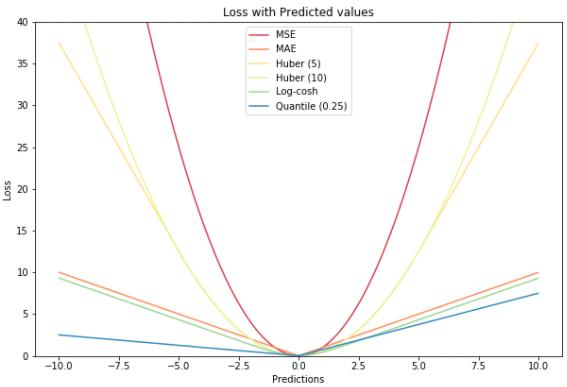

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

Crear el DataSet







In [58]:
def norm(xx):
  xmax = max(xx)
  xmin = min(xx)
  r = xmax - xmin
  return np.array(list(map(lambda x: (x-xmin)/r, xx)))

dataset = pd.read_csv('./iris.data')

x1 = (dataset[["sepal_length"]]).to_numpy()
x2 = (dataset[["sepal_width"]]).to_numpy()

x1 = norm(x1)
x2 = norm(x2)
y = (dataset[["species"]]).to_numpy()

indices = list(map(lambda e : e in ['setosa', 'versicolor'], y))
x1 = x1[indices, :]
x2 = x2[indices, :]
y = y[indices, :]
y = np.apply_along_axis(lambda e : np.array([['setosa', 'versicolor'].index(e[0])]), 1, y)

## Loss function
$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$ 

In [59]:

def sigmoid(x, w):
        return 1/(1 + np.exp(-(np.matmul(x, w))))

def derivada(x, y, w):
    return np.matmul((y.T[0] - sigmoid(x, w)), -x)/y.shape[0]

In [60]:
def update(w, dw, alfa):
  w = w - alfa * dw
  return w

In [61]:
def Plot_Loss(epochs,loss):
   plt.plot(epochs, loss)


## Testing

In [62]:
def test(x,y,w,b):
  return Error(x,y,w,b)
  # write your code here

In [63]:
def train(x, y, epochs, alpha):
  w = np.array([np.random.rand() for i in range(3)])
  for i in range(epochs):
    dw = derivada(x, y, w)
    w = update(w, dw, alpha)
  return w

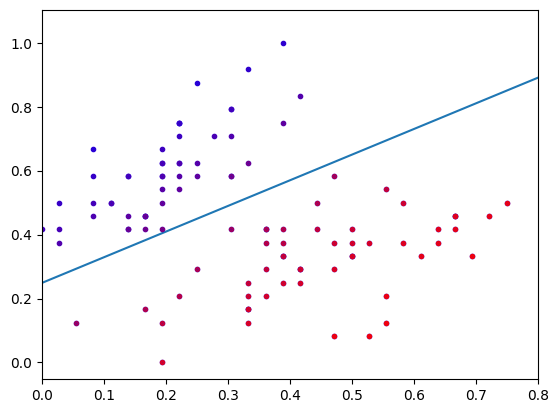

In [64]:
n = x1.shape[0]
x = np.concatenate((np.ones((n, 1)), x1, x2), 1)

w = train(x, y, 10000, 0.01)
yr = sigmoid(x, w)
linx = np.linspace(0, 1, 100)
plt.plot(linx, w[0] + w[1]*linx + w[2]*linx)
for i, xi in enumerate(x):
    plt.plot(xi[1], xi[2], ".", c="b")
    plt.plot(xi[1], xi[2], ".", c="r", alpha=yr[i])

plt.xlim((0, max(x1) + 0.05))
plt.savefig("plot.png")